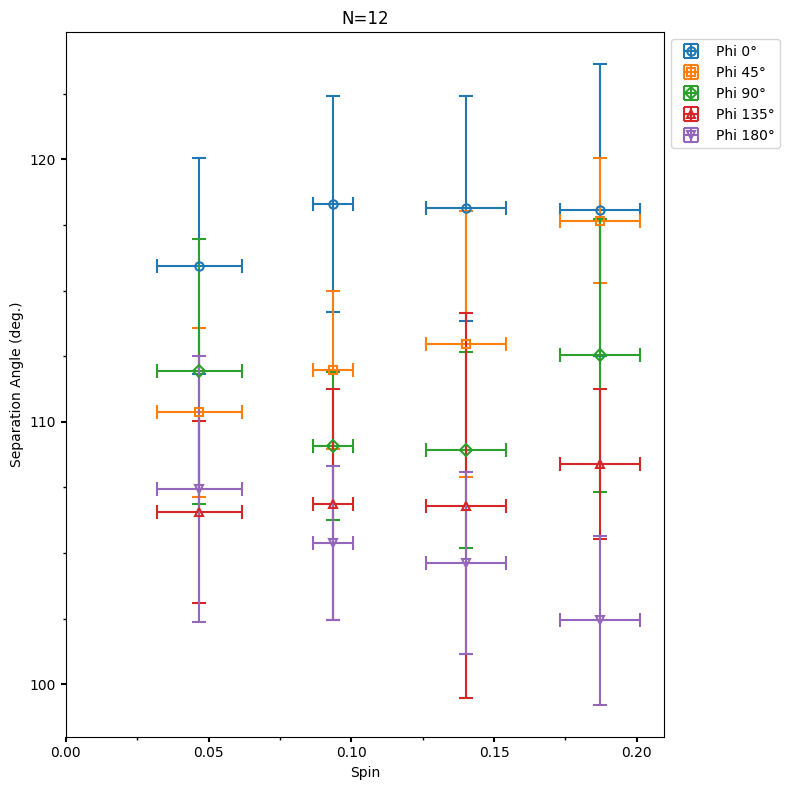

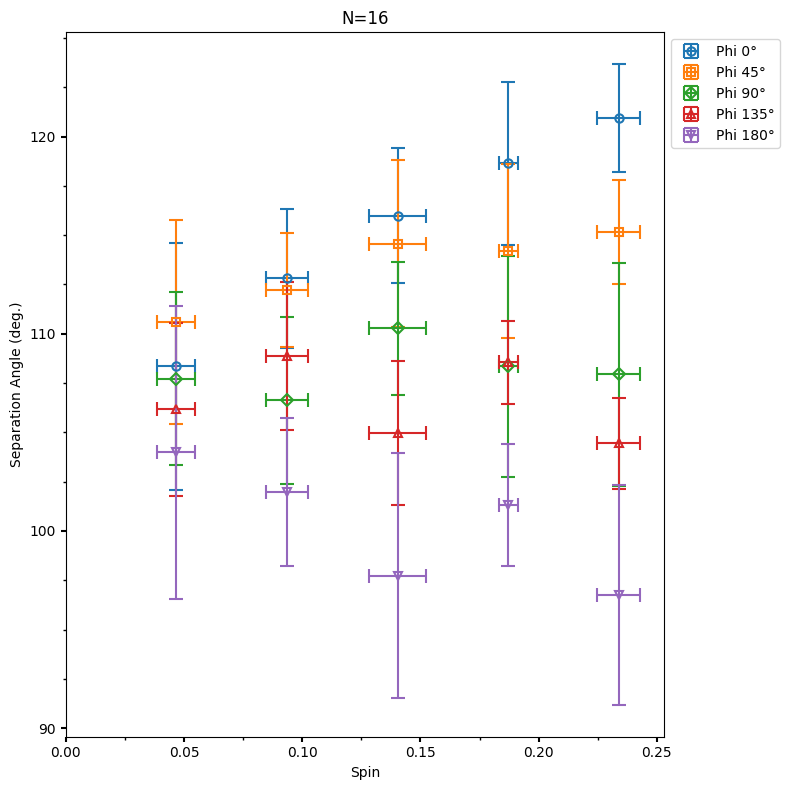

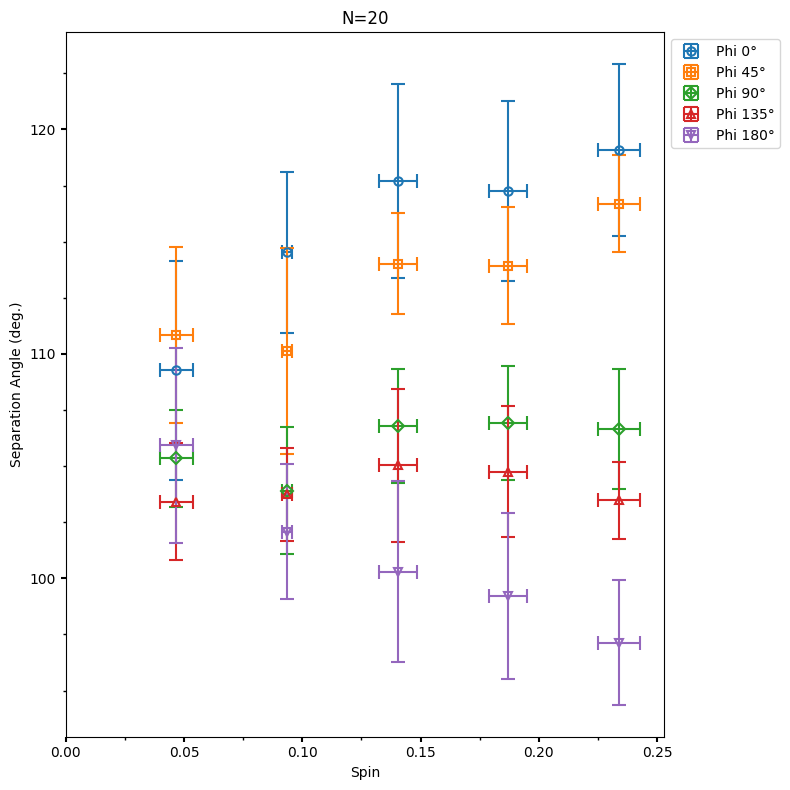

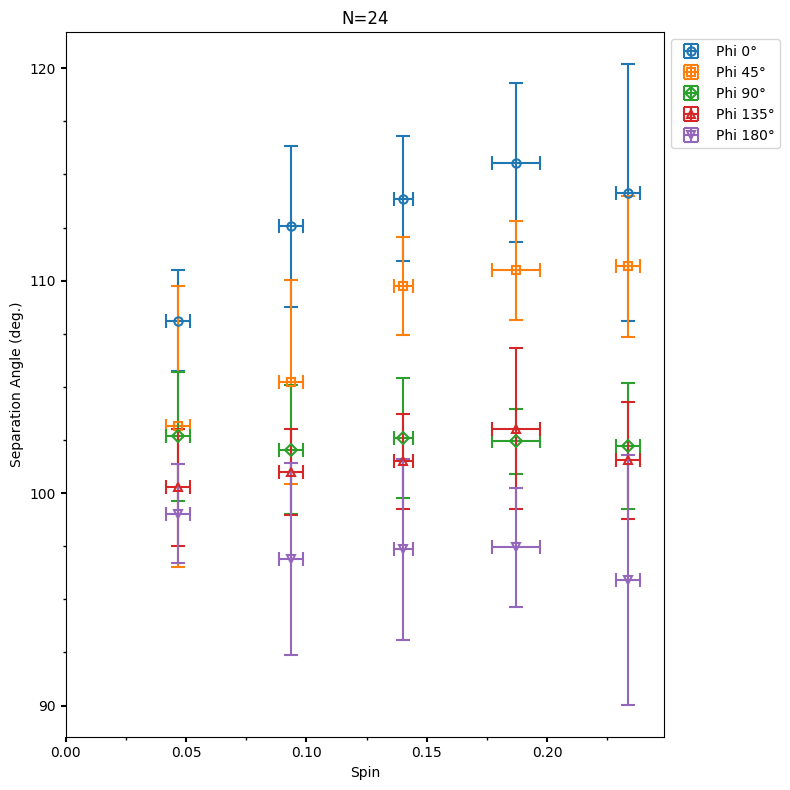

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

# Read the CSV file
data = pd.read_csv("Fig10.csv")

# Extract unique sphere numbers
sphere_numbers = data['Sphere (N)'].unique()

# Define a list of markers to cycle through
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', 'h']  # Circle, square, diamond, triangles, etc.

# Loop through each sphere number and create a separate figure
for sphere in sphere_numbers:
    # Filter data for the current sphere
    sphere_data = data[data['Sphere (N)'] == sphere]
    
    # Extract unique phi values
    phi_values = sphere_data['Phi (deg.)'].unique()
    
    # Create a new figure with a tall aspect ratio
    plt.figure(figsize=(8, 8))  # Width = 6 inches, Height = 8 inches
    
    # Loop through each phi value and plot the data
    for i, phi in enumerate(phi_values):
        # Filter data for the current phi
        phi_data = sphere_data[sphere_data['Phi (deg.)'] == phi]
        
        # Extract relevant columns
        spin = phi_data['Spin']
        spin_uncertainty = phi_data['Spin 95% Bound']
        separation_angle = phi_data['Separation Angle (deg.)']
        separation_angle_uncertainty = phi_data['Separation Angle 95% Bound (deg.)']
        
        # Select a marker from the list (cycle through if there are more phi values than markers)
        marker = markers[i % len(markers)]
        
        # Plot with error bars and use open symbols
        plt.errorbar(
            spin, 
            separation_angle, 
            xerr=spin_uncertainty, 
            yerr=separation_angle_uncertainty, 
            fmt=marker,  # Use the selected marker
            capsize=5,  # Add tabs to the error bars
            label=f'Phi {phi}°',
            markerfacecolor='None',  # Make the markers open (not filled)
            markeredgewidth=1.5  # Adjust the edge width for better visibility
        )
    
    # Set plot labels and title
    plt.title(f'N={sphere}')
    plt.xlabel('Spin')
    plt.ylabel('Separation Angle (deg.)')
    
    # Customize ticks for the horizontal axis
    plt.gca().xaxis.set_major_locator(MultipleLocator(0.05))  # Major ticks every 0.05
    plt.gca().xaxis.set_minor_locator(MultipleLocator(0.025))  # Minor ticks every 0.025
    plt.xlim(0)  # Start the horizontal axis at 0
    
    # Customize ticks for the vertical axis
    plt.gca().yaxis.set_major_locator(MultipleLocator(10))  # Major ticks every 10
    plt.gca().yaxis.set_minor_locator(MultipleLocator(2.5))  # Minor ticks every 5
    
    # Customize the weight of the tick marks
    plt.tick_params(axis='both', which='major', width=1.5)  # Major ticks heavier
    plt.tick_params(axis='both', which='minor', width=1.0)  # Minor ticks slightly lighter
    
    # Move the legend to the top right outside the plot
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    
    # Adjust layout to make space for the legend
    plt.tight_layout()
    plt.show()